# Chapter 1. 지도학습 예측모형

## 1.3 PyCaret (Low Code program)

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
import warnings
warnings.filterwarnings('ignore')

In [2]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '결측치 수(null)' : df.isnull().sum(),
                       '고유값 수(nunique)' : df.nunique()})
    return tf

In [3]:
# check version
from pycaret.utils import version
version()

'2.1.2'

In [4]:
# check version
from pycaret.utils import version
version()

'2.1.2'

## 데이터 읽고 예측하기

In [5]:
from pycaret.datasets import get_data
diabetes = get_data('diabetes')
diabetes.shape

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


(768, 9)

In [6]:
setup?

Object `setup` not found.


In [7]:
from pycaret.classification import *
clf1 = setup(data = diabetes, 
             target = 'Class variable')

Setup Succesfully Completed!


,Description,Value
0,session_id,7953
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(768, 9)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [8]:
from pycaret.classification import *
clf1 = setup(data = diabetes, target = 'Class variable')

Setup Succesfully Completed!


,Description,Value
0,session_id,5127
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(768, 9)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [9]:
len(clf1)
clf1[0]

25

,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Number of times pregnant_0,Number of times pregnant_1,Number of times pregnant_10,...,Number of times pregnant_15,Number of times pregnant_17,Number of times pregnant_2,Number of times pregnant_3,Number of times pregnant_4,Number of times pregnant_5,Number of times pregnant_6,Number of times pregnant_7,Number of times pregnant_8,Number of times pregnant_9
0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,183.0,64.0,0.0,0.0,23.3,0.672,32.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
764,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
765,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
766,126.0,60.0,0.0,0.0,30.1,0.349,47.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Ridge Classifier,0.7690,0.0000,0.5497,0.7242,0.6206,0.4599,0.4714,0.0047
1,Linear Discriminant Analysis,0.7653,0.8176,0.5550,0.7088,0.6193,0.4540,0.4629,0.0060
2,Logistic Regression,0.7652,0.8171,0.5608,0.7050,0.6195,0.4546,0.4634,0.0306
3,CatBoost Classifier,0.7636,0.8306,0.6047,0.6764,0.6346,0.4623,0.4660,1.6495
4,Extra Trees Classifier,0.7523,0.8108,0.5456,0.6883,0.6019,0.4274,0.4373,0.1404
5,Ada Boost Classifier,0.7446,0.8078,0.5924,0.6464,0.6150,0.4252,0.4285,0.0591
6,Gradient Boosting Classifier,0.7430,0.8103,0.5664,0.6472,0.5992,0.4132,0.4178,0.0868
7,Light Gradient Boosting Machine,0.7429,0.7859,0.5877,0.6448,0.6068,0.4187,0.4247,0.0326
8,Random Forest Classifier,0.7391,0.7793,0.5178,0.6570,0.5768,0.3931,0.4001,0.1193
9,Extreme Gradient Boosting,0.7319,0.7759,0.5877,0.6302,0.5992,0.3999,0.4066,0.0384


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=5127,
                solver='auto', tol=0.001)

- 상관계수와 유사한 지표인 MCC는 실제와 예측과의 상관관계를 나타낸다. '-1'부터 '1'까지의 값을 가지며
- '1'은 100% 정확한 예측, '0'은 무작위 예측, '-1'은 100% 부정확한 예측을 의미한다. 
- 사이킷런은 MCC와 유사한 지표로 cohen_kappa_score도 제공한다.

https://scikit-learn.org/stable/modules/model_evaluation.html#matthews-corrcoef

In [11]:
models()
models().shape

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False
mlp,MLP Classifier,sklearn.neural_network.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model.RidgeClassifier,True


(18, 3)

In [12]:
lr = create_model('lr', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7685,0.8098,0.5789,0.7097,0.6377,0.4702,0.4754
1,0.7500,0.8226,0.5526,0.6774,0.6087,0.4278,0.4326
2,0.8224,0.8664,0.6216,0.8214,0.7077,0.5837,0.5954
3,0.7290,0.7803,0.4595,0.6538,0.5397,0.3558,0.3669
4,0.7477,0.7992,0.5405,0.6667,0.5970,0.4162,0.4211
Mean,0.7635,0.8157,0.5506,0.7058,0.6182,0.4507,0.4583
SD,0.0320,0.0289,0.0534,0.0607,0.0549,0.0759,0.0768


In [13]:
tunes_lr = tune_model(lr, fold = 5)
tunes_lr

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7685,0.8034,0.6053,0.6970,0.6479,0.4767,0.4794
1,0.7222,0.8056,0.5000,0.6333,0.5588,0.3602,0.3655
2,0.7944,0.8537,0.5405,0.8000,0.6452,0.5079,0.5273
3,0.7477,0.8147,0.4865,0.6923,0.5714,0.4002,0.4128
4,0.7383,0.8015,0.5405,0.6452,0.5882,0.3986,0.4020
Mean,0.7542,0.8158,0.5346,0.6936,0.6023,0.4288,0.4374
SD,0.0251,0.0195,0.0414,0.0588,0.0373,0.0548,0.0581


LogisticRegression(C=8.341, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5127, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
evaluate_model(tunes_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### 분류임계값 곡선(Threshold)
- 시각화 도구인 yellowbrick (https://www.scikit-yb.org/en/latest/), 모듈 설치 conda install yellowbrick
- 분류임계값(discrimination threshold)에 따른 재현율, 정밀도, f1-score, queue rate를 확인
   * 분류임계값이 커질수록 정밀도는 증가하고 재현율은 감소한다. 
   * 정밀도와 재현율의 조화평균(f1)은 분류임계값이 '0.29'(수직 점선, tr=0.29)일 때 최대
   * 전체 데이터에서 Class variable '1'인 양성 판정을 받은 자료가 차지하는 비중을 'queue rate'

In [15]:
pred_holdout = predict_model(lr)
pred_holdout.shape
pred_holdout.iloc[:, 20:27]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7576,0.7815,0.6173,0.6667,0.641,0.4584,0.4592


(231, 27)

,Number of times pregnant_6,Number of times pregnant_7,Number of times pregnant_8,Number of times pregnant_9,Class variable,Label,Score
0,0.0,0.0,0.0,0.0,0,0,0.0646
1,0.0,0.0,0.0,0.0,0,0,0.0467
2,0.0,1.0,0.0,0.0,1,1,0.9214
3,0.0,0.0,0.0,0.0,0,0,0.4256
4,0.0,0.0,0.0,0.0,1,1,0.5222
...,...,...,...,...,...,...,...
226,0.0,0.0,0.0,0.0,0,0,0.0383
227,0.0,1.0,0.0,0.0,0,1,0.6003
228,0.0,0.0,0.0,0.0,0,0,0.0631
229,1.0,0.0,0.0,0.0,0,1,0.6925


## size korea

In [16]:
df = pd.read_csv('../data/size_korea_w_null.csv')
df.head()
df.shape

,키,몸무게,목둘레,허리둘레,BMI,체지방율,기초대사량,기초대사량평가,머리수직길이,머리두께,머리너비,발너비,발직선길이,나이,성별
0,1736.0,72.1,385.0,819.0,23.924112,18.9,1633.0,표준,224.0,188.0,159.0,88.0,228.0,25,남
1,1833.0,106.2,418.0,1036.0,31.608187,27.0,2044.0,표준이하,247.0,201.0,161.0,98.0,269.0,28,남
2,1744.0,69.1,400.0,754.0,22.718784,8.1,1742.0,표준,251.0,201.0,162.0,90.0,244.0,19,남
3,1751.0,68.4,355.0,720.0,22.309190,10.3,1695.0,표준,234.0,199.0,154.0,88.0,231.0,20,남
4,1851.0,81.9,394.0,846.0,23.904027,14.1,1890.0,표준,223.0,195.0,158.0,86.0,265.0,22,남


(6420, 15)

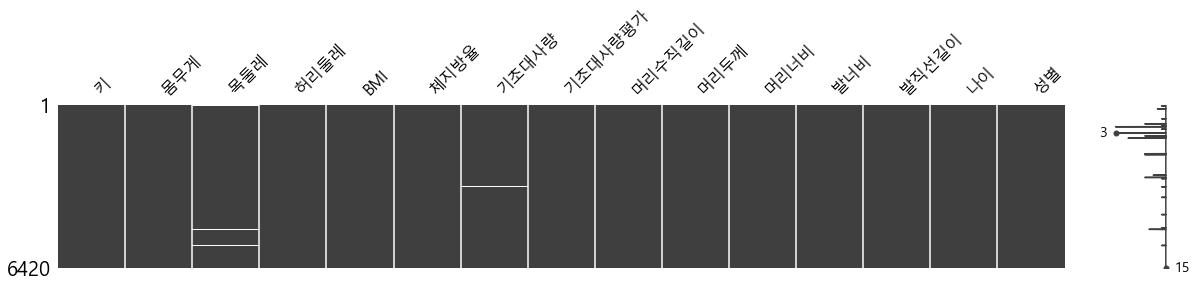

In [17]:
import missingno as msno 
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
msno.matrix(df, figsize=(20,3))

In [18]:
df.dropna(inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD0B668148>,
      dtype=object)

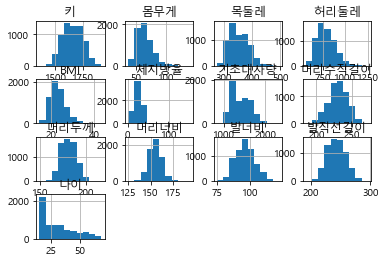

In [19]:
df.hist()

In [20]:
df.columns

Index(['키', '몸무게', '목둘레', '허리둘레', 'BMI', '체지방율', '기초대사량', '기초대사량평가', '머리수직길이',
       '머리두께', '머리너비', '발너비', '발직선길이', '나이', '성별'],
      dtype='object')

In [21]:
clf2 = setup(data = df, 
             target = '성별',
             normalize = True,
             train_size = 0.8,
             high_cardinality_features = ['체지방율'],
             silent = True)

Setup Succesfully Completed!


,Description,Value
0,session_id,2879
1,Target Type,Binary
2,Label Encoded,"남: 0, 여: 1"
3,Original Data,"(6371, 15)"
4,Missing Values,False
5,Numeric Features,13
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,True
9,High Cardinality Method,frequency


In [22]:
clf2[2]

,키,몸무게,목둘레,허리둘레,BMI,체지방율,기초대사량,머리수직길이,머리두께,머리너비,발너비,발직선길이,나이,기초대사량평가_표준,기초대사량평가_표준이상,기초대사량평가_표준이하
2998,0.507851,0.853111,0.923542,0.195211,0.720591,-0.058237,1.245573,0.136091,1.353234,1.670327,1.052543,0.697507,0.391258,1.0,0.0,0.0
1010,0.396049,0.717806,1.462324,0.793873,0.639739,1.163866,0.866463,0.358161,0.146728,2.364137,-0.055823,0.697507,1.017094,1.0,0.0,0.0
3457,0.496671,0.932702,2.390225,1.462379,0.826075,-0.058237,1.100744,-0.530120,-0.818478,0.005184,-1.441280,-0.492040,0.738944,1.0,0.0,0.0
2121,-0.598994,-0.563610,-0.962194,-0.772625,-0.302092,1.408287,-0.879999,0.506208,1.232584,0.143946,-0.194369,-0.492040,0.182646,0.0,0.0,1.0
1878,0.776177,0.081078,0.235099,0.045546,-0.392772,0.797235,0.261590,0.284138,1.232584,1.531565,1.052543,0.300991,-0.929951,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3342,0.172444,-0.659119,-1.022059,-1.201666,-0.924548,1.041656,-0.645718,-0.530120,-0.939128,0.837755,-0.887097,-0.756383,-0.234578,1.0,0.0,0.0
3431,1.782400,2.134526,0.893610,1.252847,1.210538,0.552814,2.165660,-0.160003,0.146728,0.837755,0.913997,1.556624,0.043571,1.0,0.0,0.0
160,0.396049,-0.850137,-1.111856,-1.052001,-1.291081,-0.058237,-0.658497,-0.234026,0.026077,-0.272340,-1.164189,-0.425954,-0.999488,1.0,0.0,0.0
3544,0.697915,0.367605,1.372527,-0.313651,-0.001000,-1.402551,1.262611,1.468512,0.749981,0.698994,-1.441280,-1.218985,-0.929951,1.0,0.0,0.0


In [23]:
ensemble = models(type ='ensemble').index.tolist()
ensemble

['rf', 'ada', 'gbc', 'et', 'xgboost', 'lightgbm', 'catboost']

In [24]:
ensembled_models = compare_models(include = ['rf', 'ada', 'gbc', 'et', 'xgboost', 'catboost'], fold = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.9810,0.9977,0.9800,0.9820,0.9810,0.9619,0.9620,3.2912
1,Extreme Gradient Boosting,0.9798,0.9974,0.9816,0.9781,0.9798,0.9596,0.9596,0.0818
2,Gradient Boosting Classifier,0.9763,0.9970,0.9761,0.9765,0.9763,0.9525,0.9526,0.5552
3,Extra Trees Classifier,0.9755,0.9965,0.9761,0.9750,0.9755,0.9509,0.9510,0.1405
4,Ada Boost Classifier,0.9723,0.9958,0.9698,0.9748,0.9723,0.9447,0.9447,0.1602
5,Random Forest Classifier,0.9719,0.9937,0.9682,0.9755,0.9719,0.9439,0.9439,0.1201


In [25]:
xgboost = create_model('xgboost', fold = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9770,0.9970,0.9788,0.9754,0.9771,0.9541,0.9541
1,0.9800,0.9979,0.9847,0.9756,0.9801,0.9600,0.9600
2,0.9823,0.9972,0.9812,0.9835,0.9823,0.9647,0.9647
Mean,0.9798,0.9974,0.9816,0.9781,0.9798,0.9596,0.9596
SD,0.0022,0.0004,0.0024,0.0038,0.0021,0.0043,0.0043


In [26]:
tunes_xgb = tune_model(xgboost, fold = 3)
tunes_xgb

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9812,0.9973,0.9776,0.9846,0.9811,0.9623,0.9624
1,0.9800,0.9981,0.9835,0.9767,0.9801,0.9600,0.9600
2,0.9853,0.9976,0.9859,0.9847,0.9853,0.9706,0.9706
Mean,0.9821,0.9977,0.9824,0.9820,0.9822,0.9643,0.9643
SD,0.0023,0.0003,0.0035,0.0038,0.0023,0.0045,0.0045


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.07, max_delta_step=0, max_depth=20,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=2879, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=0)

## SHAP value

- 모델안의 변수의 중요도이외 SHAP 지표

 * SHAP(Shapley Additive exPlanations) https://www.coursera.org/lecture/negotiation/the-shapley-value-solving-the-runway-problem-3A3er
 * SHAP값은 특정 변수의 예측결과에 대한 상대적 공헌도다. 
    * A와 B가 집까지 택시요금이 각각 6,000원과 11,000원이라고 하자. 두 사람이 같이 택시를 타고 가면 총 12,000원인데 A와 B는 각각 얼마를 내야 하지? 
       * 택시를 같이 타면 절약되는 5,000원을 분배율 50%로 정한다.
       * A는 6,000원에서 2,500원을 뺀 3,500원을, B는 11,000원에서 2,500원을 뺀 8,500원을 각자 부담한다면 협조적 게임의 균형이 이루어져 A와 B는 모두 만족하게 된다.


https://github.com/slundberg/shap

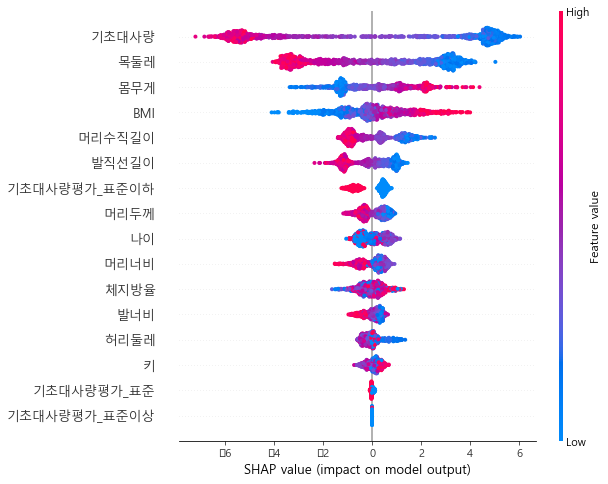

In [27]:
interpret_model(tunes_xgb)

In [28]:
pred_holdout = predict_model(tunes_xgb)
pred_holdout.shape
pred_holdout

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9851,0.9987,0.989,0.9813,0.9852,0.9702,0.9702


(1275, 19)

,키,몸무게,목둘레,허리둘레,BMI,체지방율,기초대사량,머리수직길이,머리두께,머리너비,발너비,발직선길이,나이,기초대사량평가_표준,기초대사량평가_표준이상,기초대사량평가_표준이하,성별,Label,Score
0,0.574933,1.832080,1.312662,1.721799,1.852885,0.063973,1.901561,1.912653,1.111933,0.976517,2.576546,1.094022,2.477377,1.0,0.0,0.0,남,남,0.0003
1,-2.007705,-1.813189,-1.560840,-1.341354,-1.217089,0.186183,-1.655258,-1.640471,0.870632,-1.659960,-1.025643,-1.417243,-1.069026,1.0,0.0,0.0,여,여,0.9986
2,-0.654895,-0.746669,-1.111856,-0.453339,-0.515925,-0.180448,-1.101502,0.358161,-1.059779,0.698994,-1.025643,-1.020727,-0.790876,0.0,0.0,1.0,여,여,0.9995
3,0.955061,-0.149736,0.354828,-0.453339,-0.772801,-1.280341,0.402159,0.728278,-0.215224,0.005184,0.359814,1.027936,-0.304115,1.0,0.0,0.0,남,남,0.0002
4,0.530212,-0.324837,-0.513209,-0.932269,-0.726564,-0.302658,0.342524,0.358161,-0.697827,-0.133578,-0.194369,0.102733,-0.999488,1.0,0.0,0.0,남,남,0.0179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,0.351328,0.415360,0.714016,0.454631,0.299470,0.063973,0.555507,0.432185,1.111933,0.143946,0.636906,0.499249,-0.929951,1.0,0.0,0.0,남,남,0.0001
1271,-1.158006,0.160669,0.743948,0.993427,1.163231,-2.502445,-1.169656,-0.752190,0.749981,-2.076246,0.221269,-0.161610,-0.929951,0.0,0.0,1.0,여,여,0.9824
1272,1.670597,-0.866056,1.432391,1.881442,-1.946463,1.163866,2.250853,2.504840,0.991282,2.641661,1.468180,2.217483,-0.304115,0.0,0.0,1.0,남,남,0.0000
1273,1.133945,0.104955,-0.064225,-0.353562,-0.586286,-1.158131,0.636441,0.728278,-2.386936,3.751757,-0.194369,1.226194,-0.929951,1.0,0.0,0.0,남,남,0.0002


# End

# Model Interpretability

In [29]:
from sklearn.datasets import load_wine
data  = load_wine()
df = pd.DataFrame(data.data, columns = data['feature_names'])
df['target'] = data.target

df[100::2].loc[df['target'] == 2, 'target']  = 0
df[101::2].loc[df['target'] == 2, 'target']  = 1

X = df[data['feature_names']]
y = df['target']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, 
                                                  stratify= y, random_state=11)

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## 1. Model based 특성변수 중요도

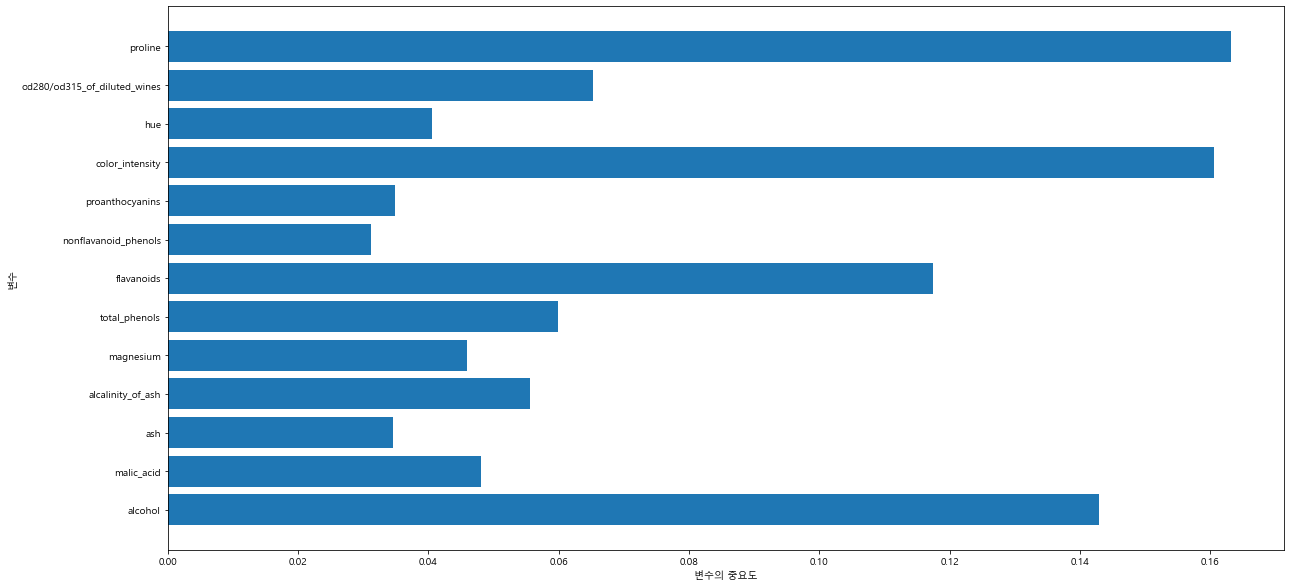

In [32]:
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
def plot_feature_importances(model):
    fig, ax = plt.subplots(1,1,figsize=(20,10))
    plt.barh(range(X_train.shape[1]), rf.feature_importances_, align='center')
    plt.yticks(np.arange(X_train.shape[1]), X_train.columns)
    plt.xlabel('변수의 중요도'); plt.ylabel('변수')
    # plt.savefig('../output/Feature_importance') # 그림 파일 저장
    
plot_feature_importances(rf)

## 2. Permutations based 특성변수 중요도

In [33]:
from sklearn.inspection import permutation_importance
result = permutation_importance(rf, X_train, y_train, n_repeats=10, random_state=0)
result.importances_mean.round(3)
np.argsort(-result.importances_mean)
X_train.columns

array([0.011, 0.   , 0.   , 0.   , 0.   , 0.   , 0.003, 0.   , 0.   ,
       0.037, 0.005, 0.   , 0.02 ])

array([ 9, 12,  0, 10,  6,  1,  2,  3,  4,  5,  7,  8, 11], dtype=int64)

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

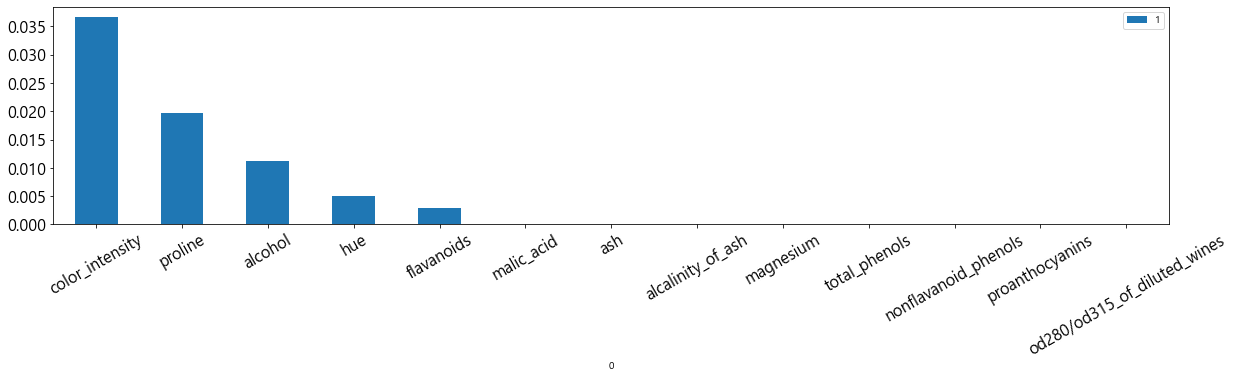

In [34]:
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
data = pd.DataFrame(list(zip(X_train.columns, result.importances_mean)))
data.sort_values(by =1, ascending= False, inplace =True)
data.plot(kind='bar', x=0, y=1, rot='30', figsize=(20, 4), fontsize=16)

## 3. 특성변수 영향도(partial dependence)

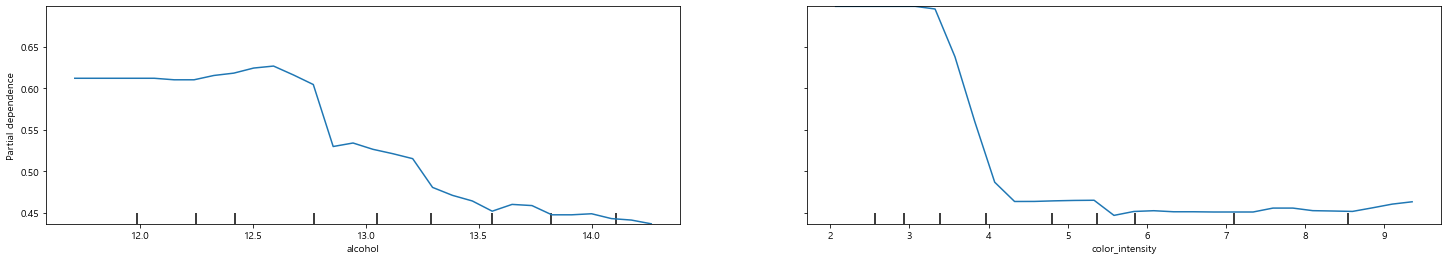

In [35]:
from sklearn.inspection import plot_partial_dependence
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
plt.rcParams['figure.figsize'] = (25,4)
features = ['alcohol', 'color_intensity']
plot_partial_dependence(rf, X_train, features, n_jobs=3, grid_resolution=30)
fig = plt.gcf(); fig.subplots_adjust(hspace=2)

# End